**Installing Libraries**

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importing Libraries**

In [3]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , classification_report , precision_recall_curve , average_precision_score

**Loading Images From Folders**

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [3]:
train_images_glioma = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Training\glioma")
train_images_meningioma = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Training\meningioma")
train_images_notumor = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Training\notumor")
train_images_pituitary = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Training\pituitary")

test_images_glioma = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Testing\glioma")
test_images_meningioma = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Testing\meningioma")
test_images_notumor = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Testing\notumor")
test_images_pituitary = load_images_from_folder(r"E:\Data\University\Semester 6\Data Mining\Project\archive\Testing\pituitary")

**Results Of Original Images**

1. Trainning Images

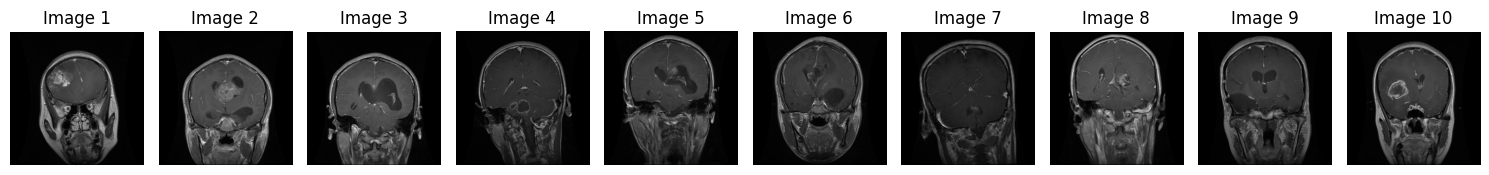

In [7]:
num_images = 10  
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  
for i in range(num_images):
    axes[i].imshow(train_images_glioma[i])
    axes[i].set_title(f'Image {i+1}')  
    axes[i].axis('off')  

plt.tight_layout()  
plt.show()

2. Testing Images

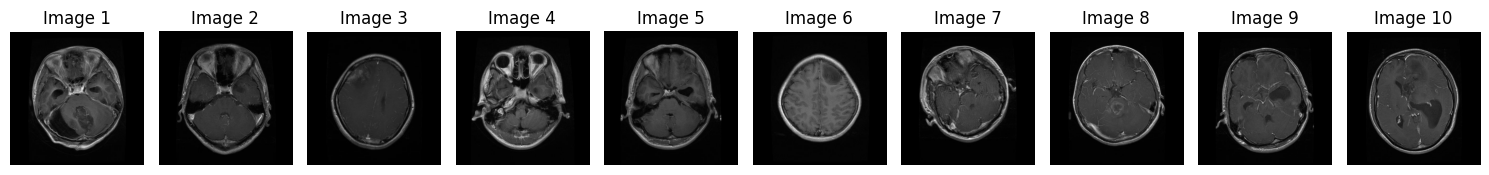

In [8]:
num_images = 10  
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  
for i in range(num_images):
    axes[i].imshow(test_images_glioma[i])
    axes[i].set_title(f'Image {i+1}')  
    axes[i].axis('off')  

plt.tight_layout()  
plt.show()

**Pre-Processing Images**

In [4]:
train_images = [train_images_notumor , train_images_glioma , train_images_meningioma , train_images_pituitary]
test_images = [test_images_glioma , test_images_meningioma , test_images_pituitary , test_images_notumor]

1. Quality Control

In [5]:
#Checking images based on different conditions to decide whether the images need to be pre-processed or not

def quality_control(img , i):
    print("Checkng For Image Number : " , i)
   #Checking Resolution
    min_width=1280
    min_height=720
    height, width = img.shape[:2]
    if width < min_width or height < min_height:
       print("The resolution is not good : Need to pre-process")
    else:
        print("The resolution is good : No need to pre-process")

    #Checking brightness
    min_brightness = 100  
    brightness = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    if brightness < min_brightness:
        print("The brightness is not good : Need to pre-process")
    else:
        print("The brghtness is good : No need to pre-process")
    
    #Checking Contrast
    min_contrast_ratio = 1.25
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    contrast = np.max(gray_img) - np.min(gray_img)
    if contrast < min_contrast_ratio * 255:
        print("The contrast is not good : Need to pre-process")
    else:
        print("The contrast is good : No need to pre-process")

    #Checking for any noise in the image    
    max_noise_level = 20
    noisy_pixels = np.sum(img != cv2.GaussianBlur(img, (5, 5), 0))
    noise_percentage = (noisy_pixels / img.size) * 100
    if noise_percentage > max_noise_level:
        print("The image consists of noise : Need to pre-process")
    else:
        print("The image does not contain noise, so there is no need to pre-process it")

1. For Training Images

In [6]:
i = 0
for image in train_images:
    for img in image:
      quality_control(img , i)
      i = i + 1
      print("\n")

Checkng For Image Number :  0
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  1
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  2
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  3
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  4
The resolution is not good : Need to pre-process
The brightnes

2. For Testing Images

In [7]:
i = 0
for image in test_images:
    for img in image:
      quality_control(img , i)
      i = i + 1
      print("\n")

Checkng For Image Number :  0
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  1
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  2
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  3
The resolution is not good : Need to pre-process
The brightness is not good : Need to pre-process
The contrast is not good : Need to pre-process
The image consists of noise : Need to pre-process


Checkng For Image Number :  4
The resolution is not good : Need to pre-process
The brightnes

2. Resizing , Noise Reduction , Contrast

In [8]:
def pre_process_images(img):
    #Resizing Image
    image = cv2.resize(img , (200,200))  
    
    # Apply Gaussian blur for noise reduction and smoothing
    image = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply median blur for removing salt-and-pepper noise
    image = cv2.medianBlur(image, 5)

    # Adjust contrast
    contrast_factor = 1.75
    image = cv2.convertScaleAbs(image, alpha=contrast_factor)
    
    return image

3. Normalization (Range (0-1))

In [9]:
def normalize_images(img):      
    image = img.astype(np.float32)
    image = image/255.0
    return image

4. Region Of Interest Crop(ROI)

In [ ]:
def roi(img):
    x1 , y1 = 100  #Top left corner
    x2 , y2 = 300  #Bottom right corner
    
    result_image = img[y1:y2, x1:x2]

    return roi

**Calling the Function**

1. For Trainning Images

In [10]:
pre_process_train_pituitary = []
pre_process_train_glioma = []
pre_process_train_notumor = []
pre_process_train_meningioma = []

for img in train_images_pituitary:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_train_pituitary.append(normalized)
        
for img in train_images_notumor:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_train_notumor.append(normalized)
        
for img in train_images_meningioma:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_train_meningioma.append(normalized)
        
for img in train_images_glioma:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_train_glioma.append(normalized)

2. For Testing Images

In [11]:
pre_process_test_pituitary = []
pre_process_test_glioma = []
pre_process_test_notumor = []
pre_process_test_meningioma = []

for img in test_images_pituitary:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_test_pituitary.append(normalized)
        
for img in test_images_notumor:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_test_notumor.append(normalized)
        
for img in test_images_meningioma:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_test_meningioma.append(normalized)
        
for img in test_images_glioma:
        process = pre_process_images(img)
        #image = roi(process)
        normalized = normalize_images(process)
        pre_process_test_glioma.append(normalized)

**Results Of Pre-Processed Images**

1. For Trainning Images

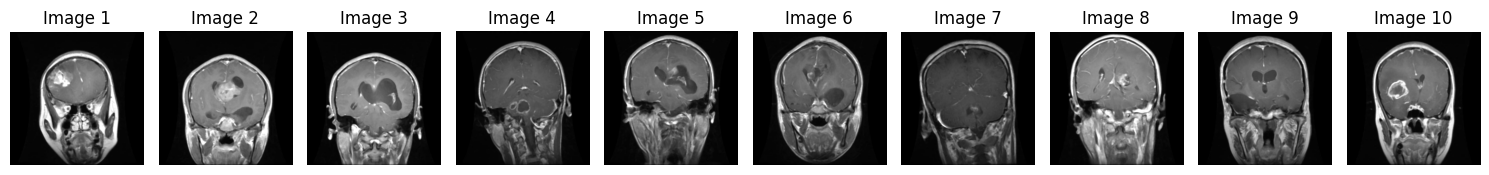

In [ ]:
#Displaying images from any one of the types of tumor from training images

num_images = 10  
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  
for i in range(num_images):
    axes[i].imshow(pre_process_train_glioma[i])
    axes[i].set_title(f'Image {i+1}')  
    axes[i].axis('off')  

plt.tight_layout()  
plt.show()

2. For Testing Images

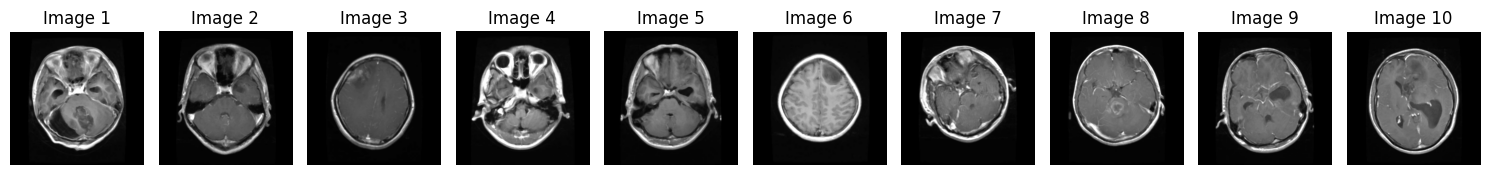

In [ ]:
#Displaying images from any one of the types of tumor from training images

num_images = 10  
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  
for i in range(num_images):
    axes[i].imshow(pre_process_test_glioma[i])
    axes[i].set_title(f'Image {i+1}')  
    axes[i].axis('off')  

plt.tight_layout()  
plt.show()

**Storing processed images in folder**

1. Trainning Images

In [17]:
pre_process_train = [pre_process_train_glioma , pre_process_train_meningioma , pre_process_test_pituitary , pre_process_train_notumor]
pre_process_test = [pre_process_test_notumor , pre_process_test_glioma , pre_process_test_meningioma , pre_process_test_pituitary]

In [58]:
save_folder = r"E:\Data\University\Semester 6\Data Mining\Project\project\Trainning"
os.makedirs(save_folder, exist_ok=True)


for i, img in enumerate(pre_process_train):
    if img.dtype == np.float32:
        img = (img * 255).astype(np.uint8)  

    if img.ndim == 2:
        img = np.expand_dims(img, axis=2) 
    elif img.shape[2] != 3:
        continue  

    pil_image = Image.fromarray(img)

    filename = f'image_{i}.jpg'  
    save_path = os.path.join(save_folder, filename)

    pil_image.save(save_path)

    print(f'Saved image: {save_path}')

print(f'All {len(pre_process_train)} images saved successfully to {save_folder}.')


Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_0.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_1.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_2.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_3.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_4.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_5.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_6.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_7.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Trainning\pituitary\image_8.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Tr

2. Testing Images

In [59]:
save_folder = r"E:\Data\University\Semester 6\Data Mining\Project\project\Testing"

os.makedirs(save_folder, exist_ok=True)

for i, img in enumerate(pre_process_test):
    if img.dtype == np.float32:
        img = (img * 255).astype(np.uint8) 

    if img.ndim == 2:
        img = np.expand_dims(img, axis=2) 
    elif img.shape[2] != 3:
        continue 

    pil_image = Image.fromarray(img)
    
    filename = f'image_{i}.jpg'  
    save_path = os.path.join(save_folder, filename)

    pil_image.save(save_path)

    print(f'Saved image: {save_path}')

print(f'All {len(pre_process_train)} images saved successfully to {save_folder}.')


Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_0.jpg


Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_1.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_2.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_3.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_4.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_5.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_6.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_7.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_8.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\image_9.jpg
Saved image: E:\Data\University\Semester 6\Data Mining\Project\project\Testing\pituitary\im

**Machine Learning Model (Logistic Regression)**

In [12]:
X_train = [pre_process_train_glioma , pre_process_train_meningioma , pre_process_train_pituitary , pre_process_train_notumor]
X_test = [pre_process_test_glioma , pre_process_test_meningioma , pre_process_test_pituitary , pre_process_test_notumor]

#Storing the labels/classes of images for y_train and y_test
y_train = ['glioma'] * len(pre_process_train_glioma) + ['meningioma'] * len(pre_process_train_meningioma) + ['pituitary'] * len(pre_process_train_pituitary) + ['notumor'] * len(pre_process_train_notumor)
y_test = ['glioma'] * len(pre_process_test_glioma) + ['meningioma'] * len(pre_process_test_meningioma) + ['pituitary'] * len(pre_process_test_pituitary) + ['notumor'] * len(pre_process_test_notumor)


encoder = LabelEncoder()      #Converting the categorical classes/labels to numeric
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [28]:
model = LogisticRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

**Evaluation of The Model**

In [7]:
acc = accuracy_score(y_test , y_pred)
print("Accuracy : " , acc)

Accuracy : 58.206


In [8]:
print("Classification Report")
print(classification_report(y_test , y_pred))

Classification Report
                 precision   recall  f1-score   support
           0       0.099     0.116   0.082      2289
           1       0.055     0.001   0.0004     1339
           2       0.119     0.111   0.251      1695
           3       0.179     0.115   0.115      1700


    accuracy                         0.5820     7023
   macro avg       0.113     0.086   0.112      7023
weighted avg       0.112     0.085   0.111      7023


**Visualization**

**1. Confusion Matrix**

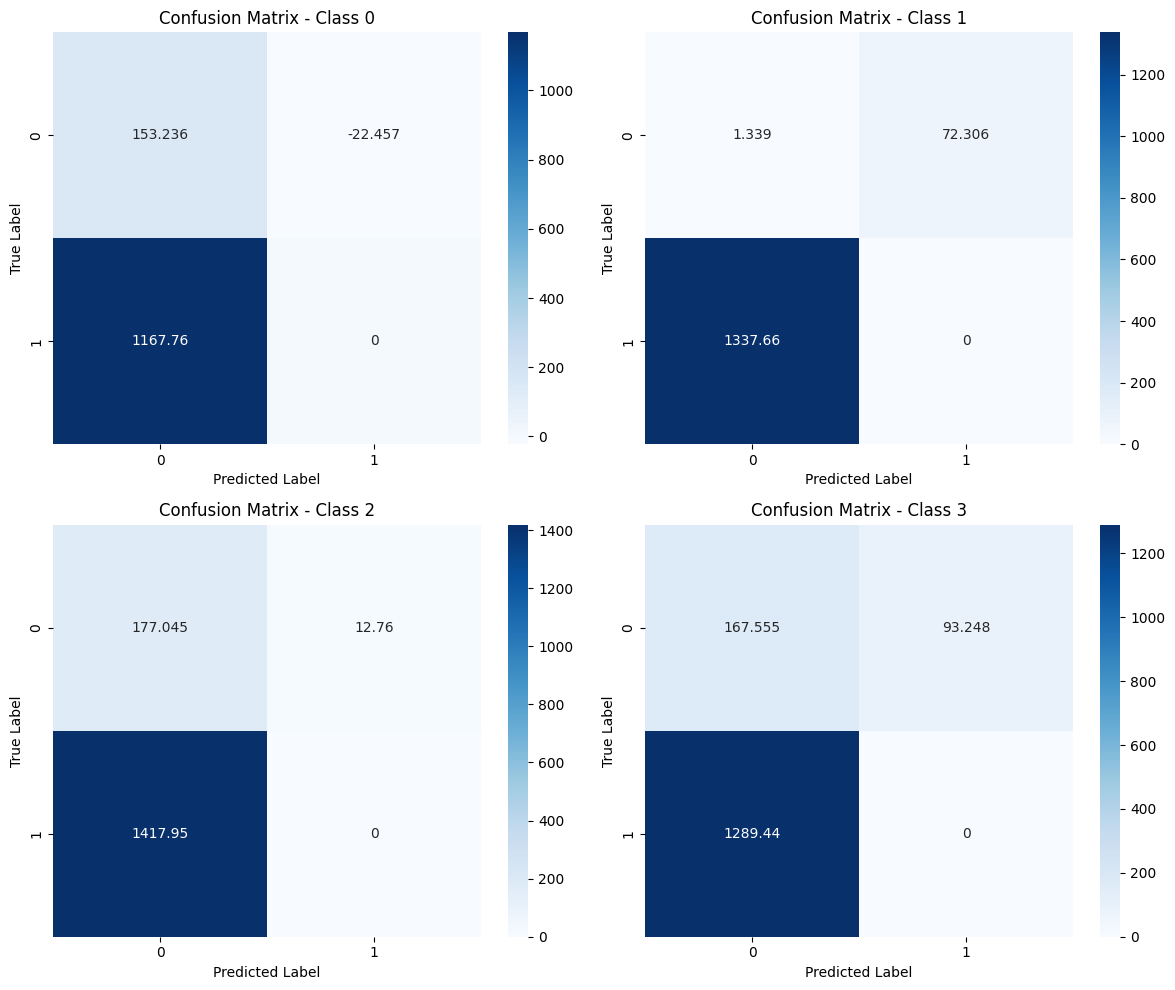

In [9]:
class_labels = ['Class 0', 'Class 1', 'Class 2' , 'Class 3']
matrix = confusion_matrix(y_test, y_pred) 

for i in range(0,4):
  plt.figure(figsize=(8, 6))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Confusion Matrix - Class ' , i)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()

**2. Precision-Recall Curve**

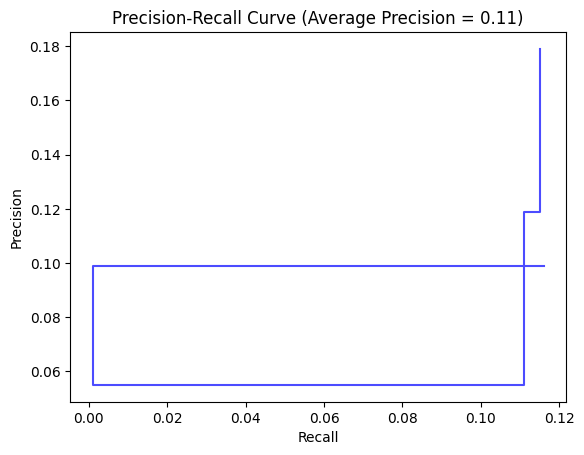

In [2]:
precision = {}
recall = {}
average_precision = {}
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_train == i, y_pred == i)
    average_precision[i] = average_precision_score(y_train == i, y_pred == i)

# Plot Precision-Recall curve for each class
plt.figure()
for i in range(4):
    plt.plot(recall[i], precision[i], lw=2, label='PR curve for class {} (average precision = {:.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()